# PRÁCTICA 9: PERCEPTRÓN SIMPLE Y ADALINE
## Ejercicio 1
## CQFidalgo

**Mediante la función “make_blobs” de pyhton, generar aleatoriamente dos grupos de datos de 1000 muestras con dos atributos. 
Represente estas muestras en el plano con puntos de un color diferente para cada grupo y compruebe que se pueden separar 
linealmente. Si no fuera posible, añada, por ejemplo, 3 unidades a uno de los atributos, produciendo, de esta manera, un
desplazamiento de muestras, que permita la separación lineal de ambos grupos.
Usando la función expuesta en clase para el perceptrón simple, calcule un separador lineal y represéntelo de nuevo en 
el plano junto con las muestras.**

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Genera el conjunto de datos conformado por 2000 muestras las cuales se dividirán entre los dos centros que indiquemos.

In [12]:
X,Y = make_blobs(n_samples=1000*2, centers=2, n_features=2, random_state=0, center_box=(-20, 20))

In [13]:
dataRaw = np.insert(X,2,Y,axis=1)
data = pd.DataFrame(data=dataRaw, columns=["x1", "x2","Grupo"]).astype({"Grupo": int})

Normaliza los datos

In [14]:
X = MinMaxScaler().fit_transform(data[['x1', 'x2']])
group = data['Grupo'].values

In [15]:
g_0 = np.argwhere(group==0)
g_1 = np.argwhere(group==1)

Dibuja una representación de cada uno de los dos grupos que más adelante separaremos

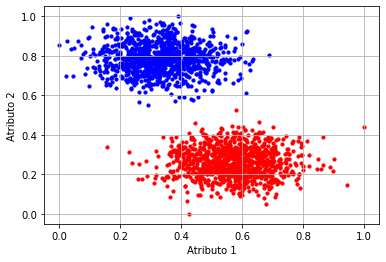

In [16]:
plt.scatter(X[g_0,0], X[g_0,1], c='blue',marker='o',s=10)
plt.scatter(X[g_1,0], X[g_1,1], c='red',marker='o',s=10)
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.grid()
plt.show()

In [17]:
class perceptron():
    
    def __init__(self, n_inputs = 2, n_outputs = 1, weight = None, bias = None):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.weight = weight
        self.bias = bias
        if self.weight is None:
            self.weight = np.random.rand(self.n_outputs, self.n_inputs) - 0.5

        if self.bias is None:
            self.bias = np.random.rand(self.n_outputs, 1) - 0.5
            
    #Devuelve la predicción.
    def predict(self, x):
        return np.sign(self.weight @ x.T + self.bias).T.astype(int)
    
    #Entrena el perceptrón dados dos parámetros.
    def train(self, X, D):
        for i in range(D.size):
            if (D[i] == 0):
                D[i] = -1
        if np.sum(self.predict(X) == D) != D.shape[0]:
            cont = True
            p = 0
            while cont:
                v = p % X.shape[0]
                x = X[v].reshape(1, -1)
                y = self.predict(x)
                d = D[v].reshape(1, -1)
                if y != d:
                    self.weight += d*x
                    self.bias += d
                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        cont = False
                p += 1
        return
    #Devuelve los parámetros que usaremos más adelante para separar los diferentes grupos.
    def get_params(self):
        return self.weight, self.bias

Crea un perceptrón con una entrada de 2 atributos y una neurona para la capa de salida y lo entrena.

In [18]:
ps = perceptron(n_inputs = 2, n_outputs = 1)

In [19]:
ps.train(X,group.reshape(-1,1))

Obtiene los valores de los pesos y el umbral para separar los diferentes grupos.

In [20]:
weights, bias = ps.get_params()

Finalmente dibujamos la representación de ambas muestras separadas linealmente por el perceptrón simple 
anteriormente creado.

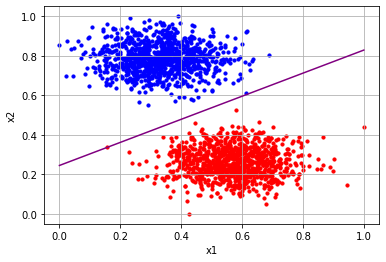

In [21]:
plt.scatter(X[g_0,0], X[g_0,1], c='blue',marker='o',s=10)
plt.scatter(X[g_1,0], X[g_1,1], c='red',marker='o',s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

x1 = np.array([0.0, 1.0])
x2 = np.array([-bias[0,0]/weights[0,1],(-bias[0,0]-weights[0,0])/weights[0,1]])

plt.plot(x1, x2, c='purple')
plt.show()